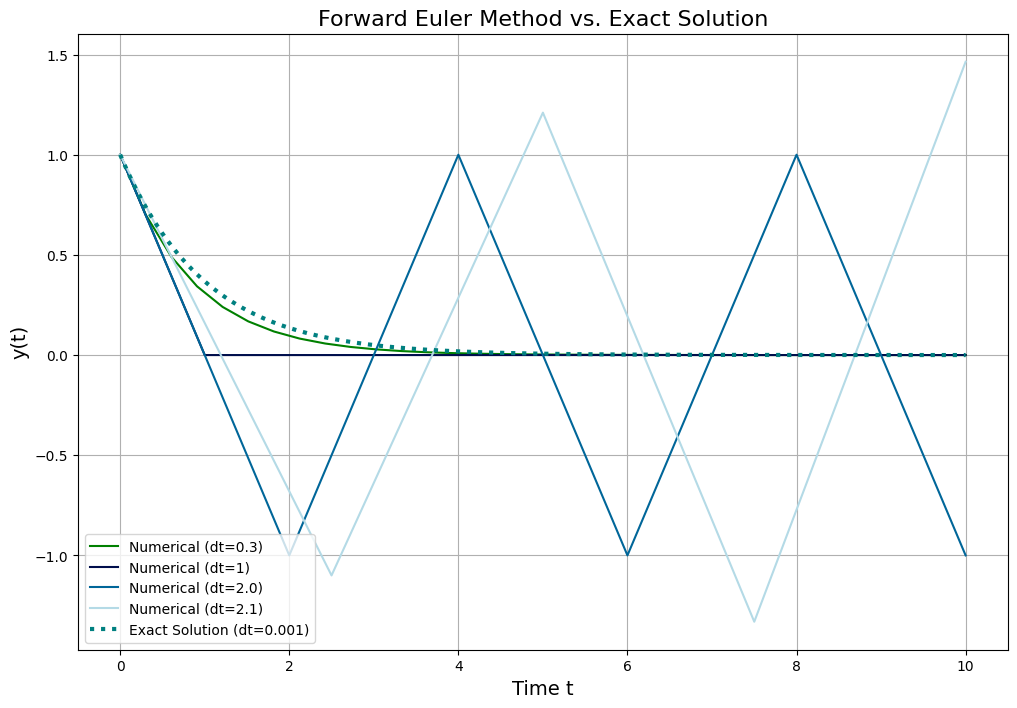

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Parameters
alpha = 1.0  # rate of decay
T = 10.0     # total time
dt_list = [0.3, 1, 2.0, 2.1]  # stable, borderline, unstable

# Function to compute the exact solution
def exact_solution(t):
    return np.exp(-alpha * t)

# Forward Euler method implementation
def forward_euler(dt):
    N = int(T / dt)  # number of time steps
    t_values = np.linspace(0, T, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = 1  # initial condition
    
    for n in range(N):
        y_values[n + 1] = y_values[n] * (1 - alpha * dt)

    return t_values, y_values

def backward_euler(dt):
    N = int(T / dt)  # number of time steps
    t_values = np.linspace(0, T, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = 1  # initial condition
    
    for n in range(N):
        y_values[n + 1] = y_values[n] * 1/(1 + alpha * dt)

    return t_values, y_values

def trapezoidal_method(dt):
    N = int(T / dt)  # number of time steps
    t_values = np.linspace(0, T, N + 1)
    y_values = np.zeros(N + 1)
    y_values[0] = 1  # initial condition
    
    for n in range(N):
        y_values[n + 1] = y_values[n] * (1 - 0.5 * alpha * dt) / (1 + 0.5 * alpha * dt)

    return t_values, y_values

# Colormap for plotting
colors = cm.ocean(np.linspace(0, .9, len(dt_list)))  # Using inferno colormap

def plot_sol(eval_type):
    # Plotting results
    plt.figure(figsize=(12, 8))
    for i, dt in enumerate(dt_list):
        if eval_type == "Forward Euler Method":
            t_values, y_numerical = forward_euler(dt)
        elif eval_type == "Backward Euler Method":
            t_values, y_numerical = backward_euler(dt)
        else:
            t_values, y_numerical = trapezoidal_method(dt)
        
        plt.plot(t_values, y_numerical, color=colors[i], label=f'Numerical (dt={dt})')
    dt = .001
    t_exact = np.linspace(0, T, int(T/dt))
    y_exact = exact_solution(t_exact)
    plt.plot(t_exact, y_exact, ":", color="teal",  linewidth = 3, label=f'Exact Solution (dt={.001})')

    plt.title(f"{eval_type} vs. Exact Solution", fontsize=16)
    plt.xlabel('Time t', fontsize=14)
    plt.ylabel('y(t)', fontsize=14)
    plt.legend(loc=3)
    plt.grid()
    plt.show()
plot_sol("Forward Euler Method")


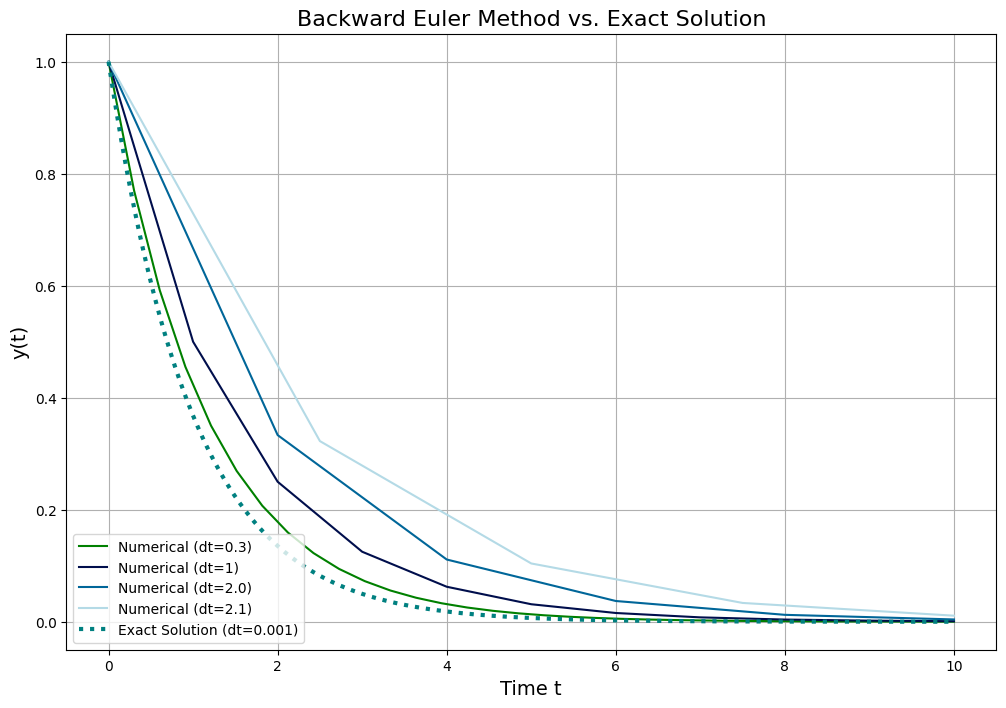

In [34]:
plot_sol("Backward Euler Method")

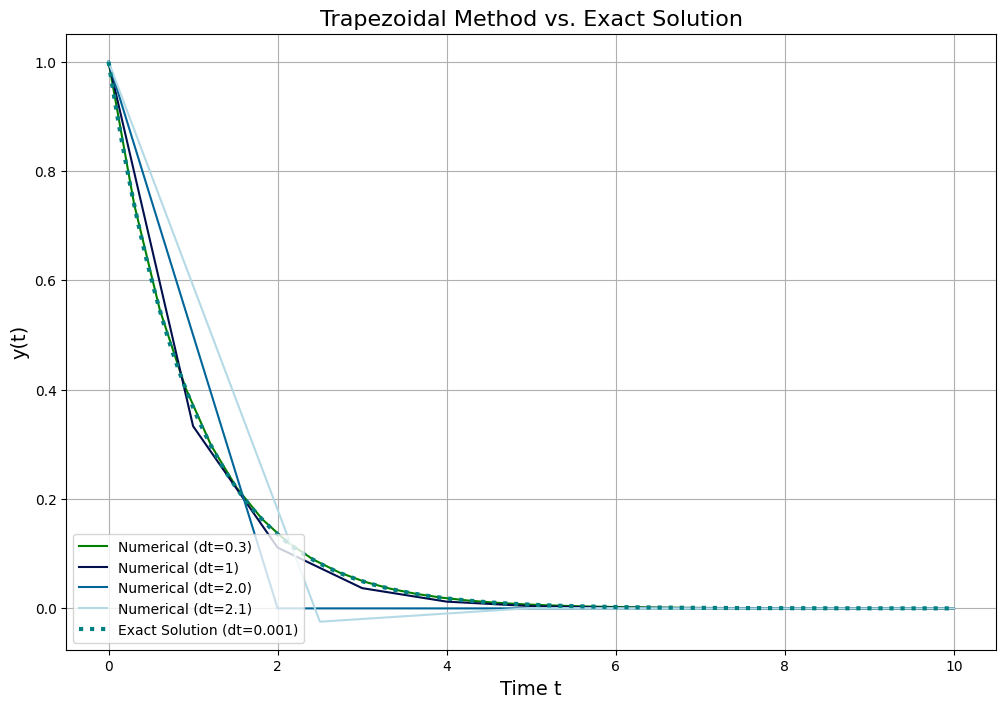

In [35]:
plot_sol("Trapezoidal Method")

Step 2:
Current dt: 0.001160503526854637
Current error: 4.0487005114442365e-05
Previous error scaled: 3.456497196973167e-05
Step 3:
Current dt: 0.0012501717960549281
Current error: 4.13767282558819e-05
Previous error scaled: 4.698531222709214e-05
Step 4:
Current dt: 0.0013467684358420512
Current error: 8.934147853412178e-06
Previous error scaled: 4.8017839070656805e-05
Step 5:
Current dt: 0.0014508287784959402
Current error: 3.2606770006660124e-05
Previous error scaled: 1.0368110093325627e-05
Step 6:
Current dt: 0.0015629295196512034
Current error: 1.3791974416865749e-05
Previous error scaled: 3.784027159206703e-05
Step 7:
Current dt: 0.0016836919143067436
Current error: 2.0283912524510228e-05
Previous error scaled: 1.6005634953061643e-05
Step 8:
Current dt: 0.0018137852197804452
Current error: 2.2049217117903197e-05
Previous error scaled: 2.353955202310504e-05
Step 9:
Current dt: 0.0019539304046896112
Current error: 6.383033940693394e-05
Previous error scaled: 2.558819422971032e-05
St

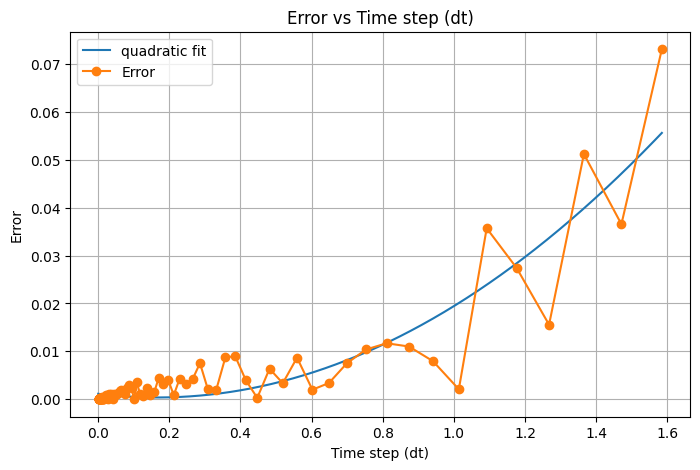

In [58]:

# Define dt_list
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dt_list = np.logspace(-3,.2, 100)
def plot_convergence(dt_list):
    errors = []
    # Calculate errors for different time steps
    for i, dt in enumerate(dt_list):
        t, y_numerical = trapezoidal_method(dt)
        y_exact = exact_solution(t)
        error = np.max(np.abs(y_numerical - y_exact))
        if i > 1:
            print(f"Step {i}:")
            print(f"Current dt: {dt}")
            print(f"Current error: {error}")
            print(f"Previous error scaled: {(dt/dt_list[i-1])**2 * errors[i-1]}")
            # assert error <=  errors[i-1] * (dt/dt_list[i-1])**2+10**-8, f"Convergence rate not met for dt = {dt}"
        errors.append(error)

    # Print errors
    for dt, error in zip(dt_list, errors):
        print(f'dt = {dt}, Error = {error}, ratio = {error/dt**2}')

    poly = PolynomialFeatures(degree=2)
    poly_dt_list = poly.fit_transform(dt_list.reshape(len(dt_list),1))

    model = LinearRegression()
    model.fit(poly_dt_list, errors)
    x = np.linspace(0,max(dt_list), 1000)
  

    # Plotting the error
    plt.figure(figsize=(8, 5))
    plt.plot(x,model.predict(poly.fit_transform(x.reshape(len(x),1))), label = "quadratic fit")
    plt.plot(dt_list, errors, 'o-', label='Error')
    plt.xlabel('Time step (dt)')
    plt.ylabel('Error')
    plt.title('Error vs Time step (dt)')
    plt.grid(True)
    plt.legend()


    plt.show()
plot_convergence(dt_list)



Step 2:
Current dt: 0.48999999999999994
Current error: 0.00012730814132982937
Previous error scaled: 0.0039494872569811115
Step 3:
Current dt: 0.3429999999999999
Current error: 0.0016974612698965053
Previous error scaled: 6.238098925161638e-05
Step 4:
Current dt: 0.24009999999999995
Current error: 0.004000170719112295
Previous error scaled: 0.0008317560222492877
Step 5:
Current dt: 0.16806999999999994
Current error: 0.002229565122368271
Previous error scaled: 0.0019600836523650236
Step 6:
Current dt: 0.11764899999999996
Current error: 0.003916962830782522
Previous error scaled: 0.001092486909960453
Step 7:
Current dt: 0.08235429999999996
Current error: 0.00108649942813549
Previous error scaled: 0.0019193117870834357
Step 8:
Current dt: 0.05764800999999997
Current error: 0.0008886454445127812
Previous error scaled: 0.0005323847197863901
Step 9:
Current dt: 0.04035360699999998
Current error: 0.0011534314795865197
Previous error scaled: 0.00043543626781126273
dt = 1.0, Error = 0.034546107

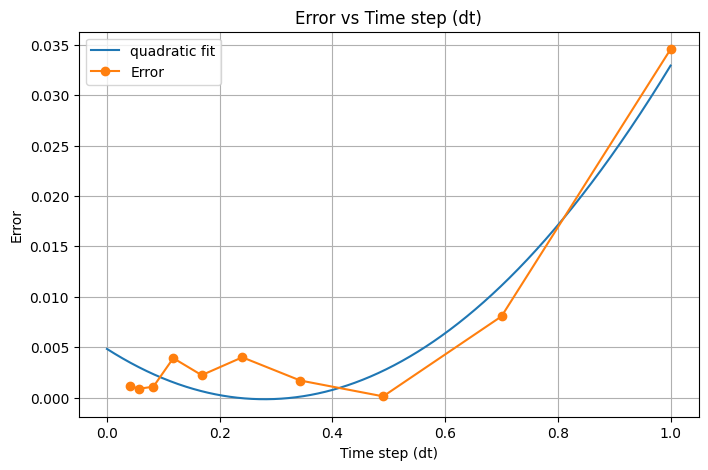

In [59]:
dt_list = np.array([1*.7**n for n in range(10)])
plot_convergence(dt_list)